## Global Variable and Functions

In [45]:
import itertools
import seaborn as sns
import datetime
from collections import OrderedDict
import warnings
# warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
import math
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

T=3
#FREQUENCY = 'Weekly'
ST_STEP = 78
LT_STEP = 155

## Make up a toy data set

In [53]:
Toy_df = pd.DataFrame(columns=['ST_Beta','ST_Sigma',
                               'LT_Beta','LT_Sigma'],data=npr.standard_exponential([5,4]))

Toy_df['Channel'] = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5']

In [54]:
Toy_df['ST_Beta'] = npr.standard_normal(5)+2
Toy_df['LT_Beta'] = npr.standard_normal(5)+npr.standard_exponential(5)+2


In [55]:
Toy_df

,ST_Beta,ST_Sigma,LT_Beta,LT_Sigma,Channel
0,2.124156,0.714272,2.563547,0.396062,Ch1
1,1.520793,1.490332,2.323037,1.371879,Ch2
2,1.704717,0.475401,1.586214,0.145984,Ch3
3,1.414170,0.022567,2.344098,0.215868,Ch4
4,1.247061,0.361828,2.845674,1.898448,Ch5


## GBM (Geometric Brownian Motion) Simulation

$S_t=S_{t-dt}\times\exp((r-\frac{1}{2}\sigma^2)dt+\sigma\sqrt{dt}Z_t)$

In [75]:
def bm_helper(df, M=ST_STEP, Times = 1000):
    
    mydf = df.copy()
    
    dt = 1/M
    S = np.zeros((M+1, Times))
    r = df['R'].values[0]
    sigma = df['Sigma_Multiplier'].values[0]
    S[0] = df['ST_Beta'].values[0]
    
    for t in range(1, M+1):
        S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*npr.standard_normal(Times))
        
    return S
    

def bm_main(df, channel, \
            Total_Year = T, \
            LT_STEP = LT_STEP, \
            ST_STEP = ST_STEP, \
            Times = 1000):
    
    mydf = df.copy()
    
    mydf['R'] = mydf['ST_Beta']/mydf['LT_Beta'] - 1
    mydf['Sigma_Multiplier'] = mydf['ST_Sigma']/mydf['LT_Sigma']
    mydf = mydf[mydf['Channel'] == channel]
    
    return bm_helper(mydf)

## 10 Times Simulation

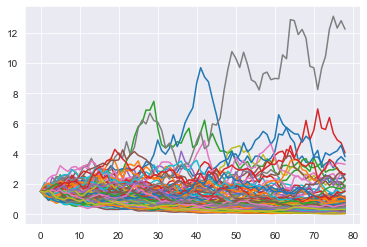

In [114]:
plt.plot(bm_main(Toy_df,"Ch2")[:,1:100]);

## End State Distribution

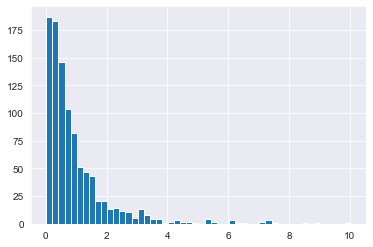

In [115]:
plt.hist(bm_main(Toy_df,"Ch2")[-1],bins=50);

## Square-root Diffusion
$dx_t = \kappa(\theta-{x_t})dt+\sigma\sqrt{x_t}dz_t)$

In [111]:
def diff_helper(df, M=ST_STEP, Times = 1000):
    
    mydf = df.copy()
    
    dt = 1/M
    kappa = 1
    x0 = df['ST_Beta'].values[0]
    theta = df['LT_Beta'].values[0]
    sigma = df['Sigma_Multiplier'].values[0]
    
    x = np.zeros((M+1,Times))
    x[0] = x0
    for t in range(1,M+1):
        df = 4*theta*kappa/sigma**2
        c= (sigma**2*(1-np.exp(-kappa*dt)))/4*kappa
        nc = np.exp(-kappa*dt)/c*x[t-1]
        x[t] = c*npr.noncentral_chisquare(df,nc,size=Times)
        
    return x
    

def diff_main(df, channel, \
            Total_Year = T, \
            LT_STEP = LT_STEP, \
            ST_STEP = ST_STEP, \
            Times = 1000):
    
    mydf = df.copy()
    
    mydf['R'] = mydf['ST_Beta']/mydf['LT_Beta'] - 1
    mydf['Sigma_Multiplier'] = mydf['ST_Sigma']/mydf['LT_Sigma']
    mydf = mydf[mydf['Channel'] == channel]
    
    return diff_helper(mydf)

## 10 Times Simulation

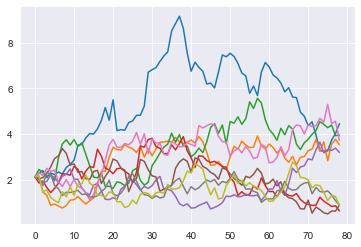

In [112]:
plt.plot(diff_main(Toy_df,"Ch1")[:,1:10]);

## End State Distribution

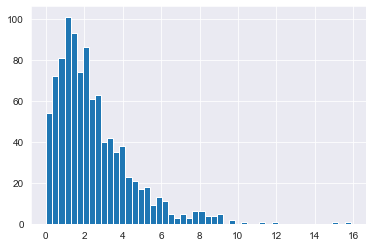

In [113]:
plt.hist(diff_main(Toy_df,"Ch1")[-1],bins=50);